# Lecture 1: T-Test and ANOVA

***

<br>
<br>
<font face="Helvetica" size="3.5px" color="#323752">In this tutorial, we will focus on two different bivariate analysis: t-test and ANOVA.

## 1- Importing Dataset, Libraries and Data Organization 

<br>
<br>
<font face="Helvetica" size="3.5px" color="#323752">As always we will import some functions that will be used throughout the tutorial. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import operator
import csv
from collections import Counter
import scipy.stats as stats
import ipywidgets as widgets
from IPython.display import HTML
import random

ModuleNotFoundError: No module named 'numpy'

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >We do not want to see undesired warnings in our report.</font>
<br>
<br>

In [2]:
warnings.filterwarnings('ignore')

<br>
<br>
<font face="Helvetica" size="3px" color="#323752" >In the following code cell we will create a function to hide/show code cells. Since some of the code cells that we will create in this tutorial is quite long especially the ones for the widgets. We will call this function inside the cells.</font>
<br>
<br>

<br>
<br>
<font face="Helvetica" size="3px" color="#323752"> Next, we will read our dataset. In order to see the features in the data we will use info() function.

In [3]:
data1 = pd.read_csv(r'democracy_gdp.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

<br>
<font face="Helvetica" size="3px" color="#323752"> In the following code cell, we will remove the unnecessary columns and continue with the ones that we will use in the tests.

In [4]:
data1 = data1[['Country name', 'Regional indicator', 'Logged GDP per capita', 'upperwhisker', 'Freedom to make life choices', 'Generosity', 'Explained by: Log GDP per capita']]

<br>
<font face="Helvetica" size="3px" color="#323752"> Next step is changing some of the names of the columns for the sake of understanding.

In [5]:
data1 = data1.rename(columns={'Country name': 'country_name'})
data1 = data1.rename(columns={'Freedom to make life choices': 'democracy'})
data1 = data1.rename(columns={'Generosity': 'freedom_house'})
data1 = data1.rename(columns={'upperwhisker': 'freedom_house_ttest'})

<br>
<font face="Helvetica" size="3px" color="#323752"> In the following cell, we will create a dictionary that use country names as dictionary keys. The main idea is spliting the total data by using country names. Therefore, we can use a country name to call all the data about this country. 

In [6]:
df_dict = {ct: data1[data1.country_name== ct].reset_index(drop=True) for ct in data1['country_name'].unique()}

<br>
<font face="Helvetica" size="3px" color="#323752"> In the next step, which is quite important for our tests, we will create freedom house parameters according to their categorization: free, partly free, and not free. Also we will create the number of occurances. 

In [7]:
free=0
partly_free=0
not_free=0

for x in range(len(data1['democracy'])):
    if data1['democracy'][x]> 0.8:
        data1['freedom_house'][x] ='Free'
        data1['freedom_house_ttest'][x]=1
        free=free+1
    elif data1['democracy'][x]<=0.8 and data1['democracy'][x]>= 0.6:
        data1['freedom_house'][x] ='Partly Free'
        data1['freedom_house_ttest'][x]=0
        partly_free=partly_free+1
    elif data1['democracy'][x]<0.6:
        data1['freedom_house'][x] ='Not Free'
        data1['freedom_house_ttest'][x]=0
        not_free=not_free+1
data1

,country_name,Regional indicator,Logged GDP per capita,freedom_house_ttest,democracy,freedom_house,Explained by: Log GDP per capita
0,Finland,Western Europe,10.775,1.0,0.949,Free,1.446
1,Denmark,Western Europe,10.933,1.0,0.946,Free,1.502
2,Switzerland,Western Europe,11.117,1.0,0.919,Free,1.566
3,Iceland,Western Europe,10.878,1.0,0.955,Free,1.482
4,Netherlands,Western Europe,10.932,1.0,0.913,Free,1.501
...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,7.926,0.0,0.715,Partly Free,0.451
145,Botswana,Sub-Saharan Africa,9.782,1.0,0.824,Free,1.099
146,Rwanda,Sub-Saharan Africa,7.676,1.0,0.897,Free,0.364
147,Zimbabwe,Sub-Saharan Africa,7.943,0.0,0.677,Partly Free,0.457


<br>
<font face="Helvetica" size="3px" color="#323752"> In order to see the statistical descriptions of the variables, we will use the describe() function.

In [8]:
data1.describe()

,Logged GDP per capita,freedom_house_ttest,democracy,Explained by: Log GDP per capita
count,149.000000,149.000000,149.000000,149.000000
mean,9.432208,0.503356,0.791597,0.977161
std,1.158601,0.501675,0.113332,0.404740
min,6.635000,0.000000,0.382000,0.000000
25%,8.541000,0.000000,0.718000,0.666000
50%,9.569000,1.000000,0.804000,1.025000
75%,10.421000,1.000000,0.877000,1.323000
max,11.647000,1.000000,0.970000,1.751000


## 2- Data Visualization 

<br>
<font face="Helvetica" size="3px" color="#323752"> We will start with an observation about the distribution of freedom house classifications.

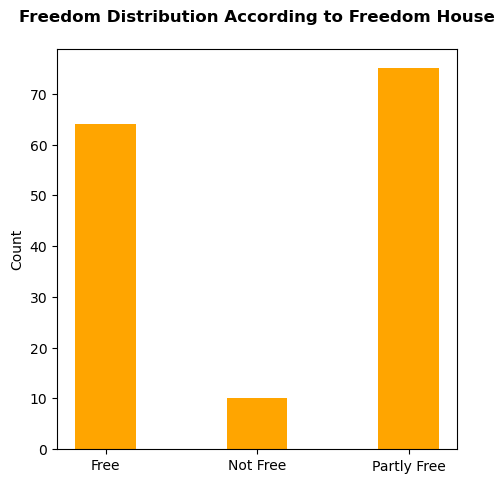

In [9]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0,0,1,1])

freedom = ['Free','Not Free','Partly Free']
count = {free, not_free, partly_free}

plt.title('Freedom Distribution According to Freedom House', fontsize=12, fontweight='bold', pad=20)
ax.bar(freedom, count, color = 'orange', width = 0.4)
plt.ylabel('Count')
plt.show()

<br>
<font face="Helvetica" size="3px" color="#323752"> Next graph will show the GDP per capita distribution by defining the freedom house statuses. We will use the histplot function from seaborn library.

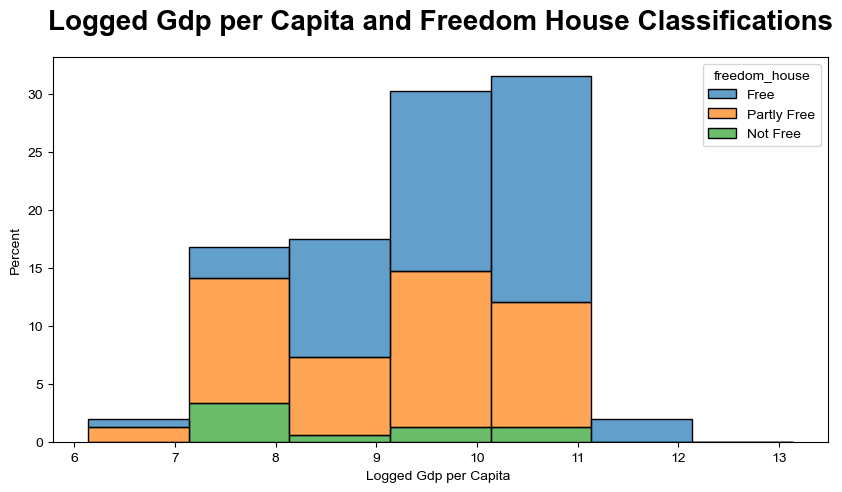

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot( x='Logged GDP per capita', data=data1,alpha = .7
            ,hue = 'freedom_house',  stat="percent", discrete=True, binwidth=1, multiple="stack", label='freedom_house');
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Logged Gdp per Capita and Freedom House Classifications', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Logged Gdp per Capita ')
plt.show()

<br>
<font face="Helvetica" size="3px" color="#323752"> In the data organization part, another feature is created. This feature is a binary indicator that shows a country is whether a free country or not. Let's examine the GDP per capita distribution according to this classification. <b> '1'</b> for free countries and <b> '0'</b> for not free countries. 

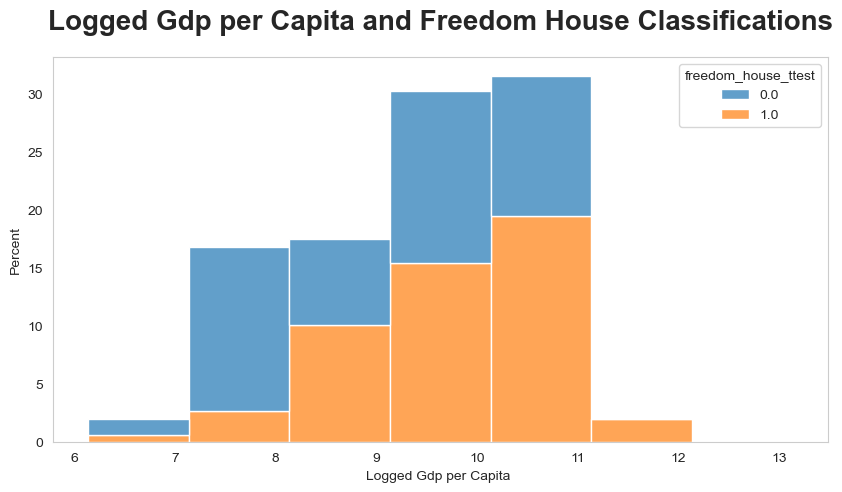

In [11]:
#For the t-test we will create binary classification for freedom house
plt.figure(figsize=(10, 5))
sns.histplot( x='Logged GDP per capita', data=data1,alpha = .7
            ,hue = 'freedom_house_ttest',  stat="percent", discrete=True, binwidth=1, multiple="stack", label='freedom_house_ttest');
sns.set_style("whitegrid", {'axes.grid' : False})
plt.title('Logged Gdp per Capita and Freedom House Classifications', fontsize=20, fontweight='bold', pad=20);
plt.xlabel('Logged Gdp per Capita ')
plt.show()

## 3- T-test

<br>
<font face="Helvetica" size="3px" color="#323752">The main focus of this section is to introduce hypothesis testing and illustrate with a few examples in Python. Whatever be the concept, its execution can be done easily with programming languages like Python. But, the most important part is drawing inference out of the output and it is highly recommended to know the math behind the executed code.

<br>
<font face="Helvetica" size="3px" color="#323752">Hypothesis testing is important in statistics because it gives statistical evidence to show the validity of the study. The null hypothesis states that there is no statistical significance exists between sets of data which implies that the population parameter will be equal to a hypothesized value. Usually, We state the alternative hypothesis which we want to prove. For a null hypothesis H0 and its complementary alternative hypothesis H1, there are 3 cases when the parametric value under H0 ≠ H1 or H0 < H1 or H0 > H1.

<br>
<font face="Helvetica" size="3px" color="#323752">In the first test we will apply an one sample t-test, whether the population mean, is less than 9. We will use the GDP per capita as our data now.

<br>
<font face="Helvetica" size="3px" color="#323752"> H0: There is no significant mean difference in Logged GDP per capita. i.e., μ = 9
<br>
H1: The population mean is less than 9. i.e., μ < 9

In [12]:
gdp = data1['Logged GDP per capita']
mu = 9

from scipy import stats

t_value,p_value=stats.ttest_1samp(gdp,mu)
one_tailed_p_value=float("{:.6f}".format(p_value/2)) # Since alternative hypothesis is one tailed, We need to divide the p value by 2.

print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for one tailed test is %f'%float("{:.10f}".format(p_value)))

alpha = 0.05
if one_tailed_p_value<=alpha:
    print('Conclusion, since p-value(%f)'%p_value,'<','alpha(%.2f)'%alpha,'''We reject the null hypothesis H0. 
So we conclude that there is no significant mean difference in GDP per capita. i.e., μ = 9 at %.2f level of significance.'''%alpha)
else:
    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0.''')

Test statistic is 4.553569
p-value for one tailed test is 0.000011
Conclusion, since p-value(0.000011) < alpha(0.05) We reject the null hypothesis H0. 
So we conclude that there is no significant mean difference in GDP per capita. i.e., μ = 9 at 0.05 level of significance.


<br>
<font face="Helvetica" size="3px" color="#323752"> To understand the other case, I determined the hypothesis mean as the mean of the data. Lets's check the output below.

In [13]:
gdp = data1['Logged GDP per capita']
mu = data1['Logged GDP per capita'].mean()

from scipy import stats

t_value,p_value=stats.ttest_1samp(gdp,mu)
one_tailed_p_value=float("{:.6f}".format(p_value/2)) # Since alternative hypothesis is one tailed, We need to divide the p value by 2.
print('Test statistic is :')
print(t_value)
print('p-value for one tailed test is %f'%one_tailed_p_value)

alpha = 0.05
if one_tailed_p_value<=alpha:
    print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0. 
        So we conclude that there is no significant mean difference in GDP per capita. i.e., μ = 9 at %.2f level of significance'''%alpha)
else:

    print('Conclusion','n','Since p-value(=%f)'%one_tailed_p_value,'>','alpha(=%.2f).'%alpha,'''We do not reject the null hypothesis H0.''')

Test statistic is :
3.7429952460779064e-14
p-value for one tailed test is 0.500000
Conclusion n Since p-value(=0.500000) > alpha(=0.05). We do not reject the null hypothesis H0.


<br>
<font face="Helvetica" size="3px" color="#323752"> In the following test, we will use two sample, one is freedom house classifications the other one is GDP per capita. 

In [14]:
gdp = data1['Logged GDP per capita']
freedom = data1['freedom_house_ttest']

t_value,p_value=stats.ttest_ind(gdp,freedom)

print('Test statistic is %f'%float("{:.10f}".format(t_value)))

print('p-value for two tailed test is:' )
print(p_value)
      
alpha = 0.05

if p_value<=alpha:
    print('')
    print('Conclusion, since p-value(=%f)'%p_value,'<','alpha(=%.2f).'%alpha,'''We reject the null hypothesis H0. So, we conclude that μ1 = μ2 at %.2f level of significance.'''%alpha)
else:
    print('Conclusion, since p-value(=%f)'%p_value,'>','alpha(=%.2f).'%alpha,'''We do not reject the null hypothesis H0.''')

Test statistic is 86.325644
p-value for two tailed test is:
6.675281120389064e-212

Conclusion, since p-value(=0.000000) < alpha(=0.05). We reject the null hypothesis H0. So, we conclude that μ1 = μ2 at 0.05 level of significance.


## 4- T-Test Interactive Widget

<br>
<font face="Helvetica"  size="3px" color="#323752"> In the following section, we will create an interactive widget. For the kernel density distribution, we will use Logged GDP per capital. User can change the test type (one-tail, two-tailed) and alpha level.    

In [15]:
a = widgets.Dropdown(
    options=['0.05', '0.01', '0.001'],
    value='0.05',
    description='α level:',
    disabled=False,
    continuous_update=False
)


c = widgets.Dropdown(
    options=['one-tail', 'two-tail'],
    value='one-tail',
    description='Test:',
    disabled=False,
    continuous_update=False
)

def two_tail(tail,value):
    
    values_2 = np.array(data1['Logged GDP per capita'])
    plt.figure()
    
    if tail == 'one-tail':
        if value == '0.05':
            mult = 1.645
        elif value == '0.01':
            mult = 2.33
        elif value == '0.001':
            mult = 3.1
        two_std_from_mean = np.mean(values_2) + np.std(values_2)*mult
        kde = stats.gaussian_kde(values_2)
        pos = np.linspace(np.min(values_2)-10, np.max(values_2)+10, 10000)
        plt.plot(pos, kde(pos), color='teal')

        shade = np.linspace(two_std_from_mean, np.max(values_2)+10, 300)
        plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')

        plt.axvline(two_std_from_mean, 0, 1, color ='gray',linestyle='--')

        plt.title("Logged GDP per capita T-Test Widget", y=1.015, fontsize=15)
        plt.xlabel("Logged GDP per capita", labelpad=14)
        plt.ylabel("frequency of occurence", labelpad=14)
    
    elif tail == 'two-tail':
        if value == '0.05':
            mult = 1.96
        elif value == '0.01':
            mult = 2.575
        elif value == '0.001':
            mult = 3.29
        
        alpha_05_positive = np.mean(values_2) + np.std(values_2)*mult
        alpha_05_negative = np.mean(values_2) - np.std(values_2)*mult
        kde = stats.gaussian_kde(values_2)
        pos = np.linspace(np.min(values_2)-10, np.max(values_2)+10, 10000)
        
        plt.plot(pos, kde(pos), color='dodgerblue')

        shade = np.linspace(alpha_05_positive, np.max(values_2)+10, 300)
        plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')

        shade2 = np.linspace(alpha_05_negative, np.min(values_2)-10, 300)
        plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')

        plt.axvline(alpha_05_positive, 0, 1, color ='gray',linestyle='--')
        plt.axvline(alpha_05_negative, 0, 1, color ='gray',linestyle='--')

        plt.title("Logged GDP per capita T-Test Widget", y=1.015, fontsize=15)
        plt.xlabel("Logged GDP per capita", labelpad=14)
        plt.ylabel("frequency of occurence", labelpad=14)

widgets.interact(two_tail, value=a, tail=c);

interactive(children=(Dropdown(description='Test:', options=('one-tail', 'two-tail'), value='one-tail'), Dropd…

## 5- ANOVA

<br>
<font face="Helvetica"  size="3px" color="#323752"><b>ANOVA</b> test is a way to find out if survey or experiment results are significant. In other words, they help you to figure out if you need to reject the null hypothesis or accept the alternate hypothesis.

<br>
<font face="Helvetica"  size="3px" color="#323752"> In the first part, we will rely on <b>Pingouin</b> library. 

In [16]:
import pingouin as pg

aov = pg.anova(data=data1, dv='Logged GDP per capita', between='freedom_house', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,freedom_house,23.714478,2,11.857239,9.894903,0.000093,0.119367
1,Within,174.954405,146,1.198318,NaN,NaN,NaN


<br>
<font face="Helvetica"  size="3px" color="#323752"> As we can see, we have a <b>p-value</b> below the threshold, so there is a significant difference between the various groups.

<br>
<font face="Helvetica"  size="3px" color="#323752"> We can also use <b>scipy</b> tools to implement ANOVA. Let's get started by importing <b>f</b> function.

In [17]:
from scipy.stats import f

<br>
<font face="Helvetica"  size="3px" color="#323752"> Next, we will choose data columns that we will use.

In [18]:
data2 = data1[['Logged GDP per capita','freedom_house_ttest']]
data2

,Logged GDP per capita,freedom_house_ttest
0,10.775,1.0
1,10.933,1.0
2,11.117,1.0
3,10.878,1.0
4,10.932,1.0
...,...,...
144,7.926,0.0
145,9.782,1.0
146,7.676,1.0
147,7.943,0.0


<br>
<font face="Helvetica"  size="3px" color="#323752"> The first step to perform an ANOVA test is to calculate the <b>SST (total sum of squares)</b>, the <b>SSW (total sum of squares within)</b>, and the <b>SSB (total sum of squares between)</b>, and the corresponding degrees of freedom. They calculated as following:

<br>
<font face="Helvetica"  size="3px" color="#323752"><b>SST</b> is the sum of the squared distance between each data point and the mean of the dataset. The degrees of freedom, in this case, is the number of groups m times the number of data points n in each group, and then we subtract 1, i.e., m•n -1.

<br>
<font face="Helvetica"  size="3px" color="#323752"><b>SSW</b> is the sum of the squared distance between each data point and the respective group mean. The degrees of freedom is the number of groups times the number of data points minus 1, i.e., m•(n -1).

<br>
<font face="Helvetica"  size="3px" color="#323752"><b>SSB</b> is the sum of the squared distance between each group mean and the mean of the dataset for each data point. The degrees of freedom is the number of groups minus 1, i.e., m -1. 

In [19]:
m = data2.shape[1]
n = data2.shape[0]

In [20]:
SST = np.sum(np.sum((data2 - np.mean(np.mean(data2)))**2))
SST

6175.385322822148

In [21]:
data2_sst = m*n-1
data2_sst

297

In [22]:
SSW = np.sum(np.sum((data2 - np.mean(data2))**2))
SSW

235.9172046979866

In [23]:
data2_ssw = m*(n-1)
data2_ssw

296

In [24]:
SSB = np.sum(np.sum((np.tile(np.mean(data2), (3,1)) - np.mean(np.mean(data2)))**2))
SSB

119.58660640518437

In [25]:
data2_ssb = m-1
data2_ssb

1

<br>
<font face="Helvetica"  size="3px" color="#323752"> Let’s define our hypothesis test.

<br>
<font face="Helvetica"  size="3px" color="#323752"> As usual, we will assume that our null hypothesis is true and figure out the probability of getting a statistic as extreme or more extreme than the one we get from the data observed. For that, we will use an <b>F-statistic</b>, which is basically a ratio of two <b>chi-square statistics</b>. It is actually the ratio of two of the metrics calculated above divided by their respective degrees of freedom:

<br>
<font face="Helvetica"  size="3px" color="#323752"> The idea is that if the numerator is significantly larger than the denominator, this should make us believe that there is a difference between the true populations' means. Conversely, if the denominator is significantly larger, it means that the variation within each sample is a bigger percentage of the total variation when compared with the variation between the samples. Thus, any difference we could observe in the means is probably just a result of random chance.

In [26]:
F = (SSB/data2_ssb)/(SSW/data2_ssw)
F

150.04261999988282

In [27]:
f.ppf(0.95, dfn=data2_ssb, dfd=data2_ssw)

3.8730662237529048

<br>
<font face="Helvetica"  size="3px" color="#323752"> Now, we can calculate our p-value. Let’s use a significance level of 0.1.

In [28]:
p_value = (1 - f.cdf(F, dfn=data2_ssb, dfd=data2_ssw))*2
p_value

2.220446049250313e-16

In [29]:
if p_value<0.1:
    print('Reject H_0')
else:
    print('Accept H_0')

Reject H_0


<br>
<font face="Helvetica"  size="3px" color="#323752"> We see that the p-value is smaller than the significance level, which makes us reject the null hypothesis. There is enough evidence to accept a difference between the populations’ means that does not come from chance alone or from the variance within each group.